I just came across this [neat little exercise on cannonball trajectory](https://cpge-paradise.com/Concours2023/Mines/Phys1MP2023.pdf) (in French). In this notebook, I just want to draw some of them and verify numerically that I solved the problem correctly. 

# Numerical verification

According to my math, the equation of a trajectory is 

$$
\begin{aligned}
u_y = v_y^0 t\\
u_z = -{1\over 2} g t^2 + v_z ^0 t\\
\end{aligned}
$$

Additionnally, the top point of the trajectory is 

$$
S = ({v_y ^ 0 v_z ^0 \over g}, (\frac{1}{2} {(v_z^0) ^2 \over g}))
$$

And the maximum distance of the projectile is 

$$
l = v_0 ^2 g \sin(2 \theta_0)
$$

Let’s use an ODE solver to integrate the equations numerically and let’s compare the outputs.

In [1]:
import numpy as np
from scipy.integrate import solve_ivp

g = 9.81
v0 = 1.
theta0 = np.deg2rad(40.)
y0 = [v0 * np.cos(theta0), v0 * np.sin(theta0), 0, 0]
tmax = 0.2
t_eval = np.linspace(0, tmax)

def fun(t, y):
    return [0, -g, y[0], y[1]]

solver = solve_ivp(fun, t_span=(0, tmax), y0=y0, t_eval=t_eval)

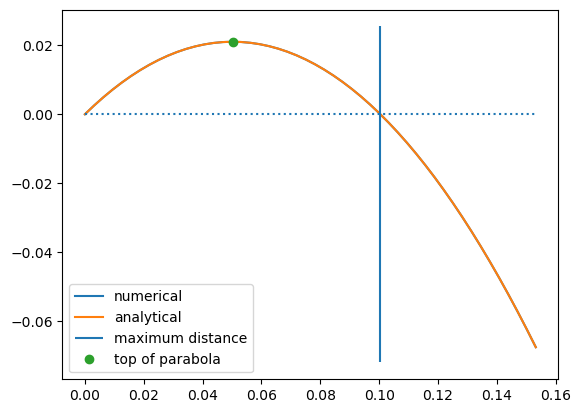

In [2]:
import matplotlib.pyplot as plt

def analytical_trajectory(t, y0):
    return np.array([y0[0] * t,  -1/2 * g * t**2 + y0[1] * t])

fig, ax = plt.subplots()
ax.plot(solver.y[2, :], solver.y[3, :], label='numerical')
ax.plot(*analytical_trajectory(solver.t, y0), label='analytical')
ax.vlines(v0**2 / g * np.sin(2 * theta0), *ax.get_ylim(), label='maximum distance')
ax.hlines(0, 0, analytical_trajectory(solver.t, y0)[0].max(), linestyles='dotted')
ax.plot(y0[0] * y0[1] / g, 1/2 * y0[1]**2 / g, 'o', label='top of parabola')
ax.legend()

Nice, both methods give the same results! Let’s now draw several of the trajectories.

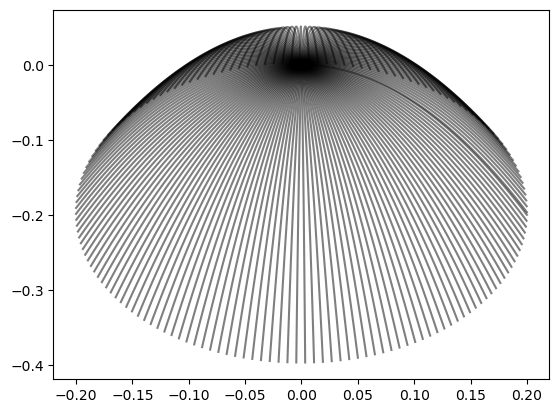

In [3]:
def draw_trajectories(ax, angles):
    for theta0_deg in angles:
        theta0 = np.deg2rad(theta0_deg)
        y0 = [v0 * np.cos(theta0), v0 * np.sin(theta0), 0, 0]
        ax.plot(*analytical_trajectory(solver.t, y0), color='k', alpha=0.5)


fig, ax = plt.subplots()
angles = np.linspace(0, 359, num=160)
draw_trajectories(ax, angles)

A cute little graph, just the way I like it!

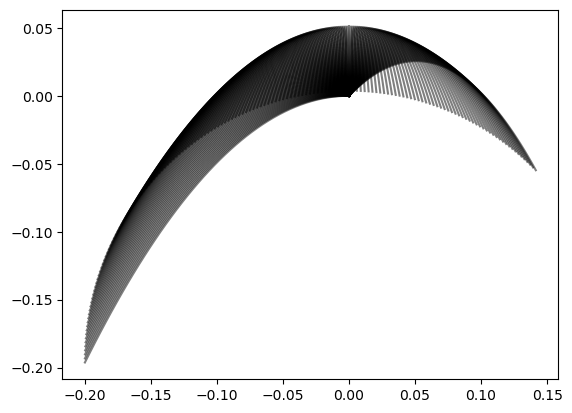

In [4]:
fig, ax = plt.subplots()
angles = np.linspace(45, 180, num=160)
draw_trajectories(ax, angles)

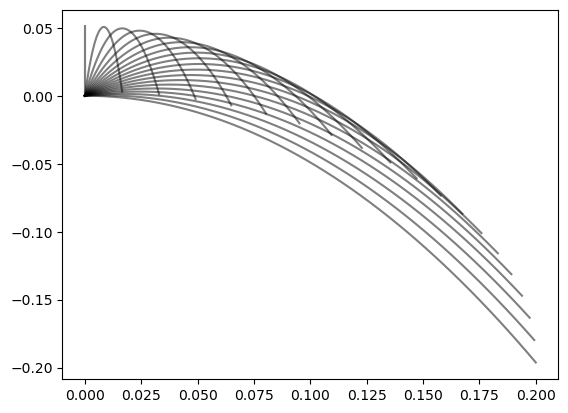

In [5]:
fig, ax = plt.subplots()
angles = np.linspace(0, 90, num=20)
draw_trajectories(ax, angles)

Finally, let’s find what the angle that assures maximum distance is, graphically.

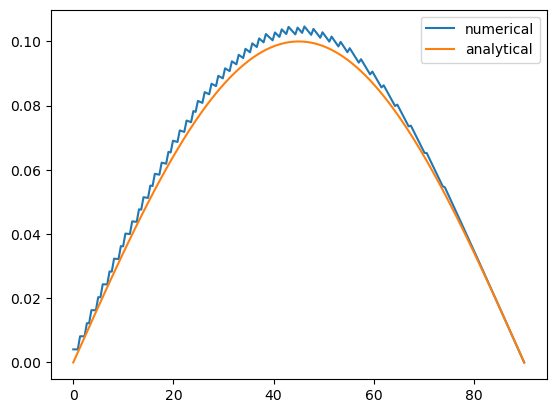

In [6]:
angles = np.linspace(0, 90, num=200)
maxdists = []
for theta0 in np.deg2rad(angles):
    y0 = [v0 * np.cos(theta0), v0 * np.sin(theta0), 0, 0]
    traj = analytical_trajectory(solver.t, y0)
    
    for i in range(traj.shape[1]):
        if traj[1][i] < 0:
            break
    
    maxdist = traj[0][i]
    maxdists.append(maxdist)
    
fig, ax = plt.subplots()
ax.plot(angles, maxdists, label='numerical')
ax.plot(angles, 0.1 * np.sin(2 * np.deg2rad(angles)), label='analytical')
ax.legend()

*This post was entirely written using the Jupyter Notebook. Its content is BSD-licensed. You can see a static view or download this notebook with the help of nbviewer at [20230828_cannonTrajectory.ipynb](http://nbviewer.ipython.org/urls/raw.github.com/flothesof/posts/master/20230828_cannonTrajectory.ipynb).*